<a href="https://colab.research.google.com/github/ljtaylor99/AAI-530-Final-Project/blob/main/AAI530_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import glob
import numpy as np
from datetime import datetime

In [2]:
paths = './*.csv'

In [3]:
all_data = pd.DataFrame()
for f in glob.glob(paths):
    df = pd.read_csv(f, engine='python')
    df['filename'] = f
    all_data = all_data.append(df, ignore_index=True)

In [4]:
all_data.shape

(1880795, 5)

In [5]:
all_data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'filename'], dtype='object')

In [6]:
all_data.groupby('Base').count()

,Date/Time,Lat,Lon,filename
Base,,,,
B02512,104810,104810,104810,104810
B02598,686787,686787,686787,686787
B02617,415195,415195,415195,415195
B02682,645617,645617,645617,645617
B02764,28386,28386,28386,28386


In [7]:
all_data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
filename     0
dtype: int64

In [8]:
all_data['Month'] = pd.to_datetime(all_data['Date/Time']).dt.month

In [9]:
all_data.groupby(['Month', 'Base']).count()

Date/Time     Lat     Lon  filename
Month Base                                       
4     B02512      35536   35536   35536     35536
      B02598     183263  183263  183263    183263
      B02617     108001  108001  108001    108001
      B02682     227808  227808  227808    227808
      B02764       9908    9908    9908      9908
5     B02512      36765   36765   36765     36765
      B02598     260549  260549  260549    260549
      B02617     122734  122734  122734    122734
      B02682     222883  222883  222883    222883
      B02764       9504    9504    9504      9504
6     B02512      32509   32509   32509     32509
      B02598     242975  242975  242975    242975
      B02617     184460  184460  184460    184460
      B02682     194926  194926  194926    194926
      B02764       8974    8974    8974      8974

In [10]:
all_data['Lat/Lon'] = '('+ all_data['Lat'].astype(str) + ', ' + all_data['Lon'].astype(str) + ')'

In [11]:
grouped = all_data.groupby('Lat/Lon').count().reset_index()
grouped.sort_values('Date/Time', ascending=False)

,Lat/Lon,Date/Time,Lat,Lon,Base,filename,Month
13030,"(40.6449, -73.7822)",1495,1495,1495,1495,1495,1495
13031,"(40.6449, -73.7823)",1257,1257,1257,1257,1257,1257
13029,"(40.6449, -73.7821)",1256,1256,1256,1256,1256,1256
13119,"(40.645, -73.7819)",1174,1174,1174,1174,1174,1174
13120,"(40.645, -73.782)",1071,1071,1071,1071,1071,1071
...,...,...,...,...,...,...,...
133308,"(40.726, -73.9392)",1,1,1,1,1,1
133313,"(40.726, -73.9401)",1,1,1,1,1,1
133314,"(40.726, -73.9402)",1,1,1,1,1,1
133323,"(40.726, -73.9411)",1,1,1,1,1,1


In [12]:
all_data.head()

,Date/Time,Lat,Lon,Base,filename,Month,Lat/Lon
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512,./uber-raw-data-jun14.csv,6,"(40.7293, -73.992)"
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512,./uber-raw-data-jun14.csv,6,"(40.7131, -74.0097)"
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512,./uber-raw-data-jun14.csv,6,"(40.3461, -74.661)"
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512,./uber-raw-data-jun14.csv,6,"(40.7555, -73.9833)"
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512,./uber-raw-data-jun14.csv,6,"(40.688, -74.1831)"


In [13]:
def get_day_name(date):
    date = pd.Timestamp(date)
    return date.day_name()

In [14]:
all_data['DayOfWeek'] = all_data['Date/Time'].apply(lambda x: get_day_name(x))

In [15]:
all_data.head()

,Date/Time,Lat,Lon,Base,filename,Month,Lat/Lon,DayOfWeek
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512,./uber-raw-data-jun14.csv,6,"(40.7293, -73.992)",Sunday
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512,./uber-raw-data-jun14.csv,6,"(40.7131, -74.0097)",Sunday
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512,./uber-raw-data-jun14.csv,6,"(40.3461, -74.661)",Sunday
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512,./uber-raw-data-jun14.csv,6,"(40.7555, -73.9833)",Sunday
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512,./uber-raw-data-jun14.csv,6,"(40.688, -74.1831)",Sunday


In [16]:
fri_data = all_data[all_data['DayOfWeek']=='Friday'].reset_index(drop=True)

In [17]:
fri_data.shape

(329350, 8)

In [18]:
fri_data['Time'] = pd.to_datetime(fri_data['Date/Time']).dt.time

In [19]:
fri_data['DayNum'] = pd.to_datetime(fri_data['Date/Time']).dt.day

In [20]:
fri_data.head()

,Date/Time,Lat,Lon,Base,filename,Month,Lat/Lon,DayOfWeek,Time,DayNum
0,6/6/2014 0:02:00,40.7444,-73.9810,B02512,./uber-raw-data-jun14.csv,6,"(40.7444, -73.981)",Friday,00:02:00,6
1,6/6/2014 0:03:00,40.7384,-73.9856,B02512,./uber-raw-data-jun14.csv,6,"(40.7384, -73.9856)",Friday,00:03:00,6
2,6/6/2014 0:05:00,40.7526,-74.0044,B02512,./uber-raw-data-jun14.csv,6,"(40.7526, -74.0044)",Friday,00:05:00,6
3,6/6/2014 0:06:00,40.7255,-73.9840,B02512,./uber-raw-data-jun14.csv,6,"(40.7255, -73.984)",Friday,00:06:00,6
4,6/6/2014 0:16:00,40.7588,-73.9727,B02512,./uber-raw-data-jun14.csv,6,"(40.7588, -73.9727)",Friday,00:16:00,6


In [21]:
fri_data.groupby(['Base','DayNum']).count()

Date/Time   Lat   Lon  filename  Month  Lat/Lon  DayOfWeek  \
Base   DayNum                                                               
B02512 2            1467  1467  1467      1467   1467     1467       1467   
       4            1827  1827  1827      1827   1827     1827       1827   
       6            1225  1225  1225      1225   1225     1225       1225   
       9            1554  1554  1554      1554   1554     1554       1554   
       11           1362  1362  1362      1362   1362     1362       1362   
...                  ...   ...   ...       ...    ...      ...        ...   
B02764 20            321   321   321       321    321      321        321   
       23            367   367   367       367    367      367        367   
       25            362   362   362       362    362      362        362   
       27            311   311   311       311    311      311        311   
       30            306   306   306       306    306      306        306   

               Time  
Base   DayNum        
B02512 2       1467  
       4       1827  
       6       1225  
       9       1554  
       11      1362  
...             ...  
B02764 20       321  
       23       367  
       25       362  
       27       311  
       30       306  

[65 rows x 8 columns]

In [22]:
#sub_data = fri_data[fri_data['Base'] == 'B02764']

In [23]:
#sub_data['Lat/Lon'].nunique()

In [24]:
lat_lon_dic = dict(enumerate(fri_data['Lat/Lon'].unique()))

In [25]:
key_lat_lon = dict([(value, key) for key, value in lat_lon_dic.items()])

In [26]:
fri_data['LocMask'] =  fri_data['Lat/Lon'].map(key_lat_lon)

In [27]:
fri_data.head()

,Date/Time,Lat,Lon,Base,filename,Month,Lat/Lon,DayOfWeek,Time,DayNum,LocMask
0,6/6/2014 0:02:00,40.7444,-73.9810,B02512,./uber-raw-data-jun14.csv,6,"(40.7444, -73.981)",Friday,00:02:00,6,0
1,6/6/2014 0:03:00,40.7384,-73.9856,B02512,./uber-raw-data-jun14.csv,6,"(40.7384, -73.9856)",Friday,00:03:00,6,1
2,6/6/2014 0:05:00,40.7526,-74.0044,B02512,./uber-raw-data-jun14.csv,6,"(40.7526, -74.0044)",Friday,00:05:00,6,2
3,6/6/2014 0:06:00,40.7255,-73.9840,B02512,./uber-raw-data-jun14.csv,6,"(40.7255, -73.984)",Friday,00:06:00,6,3
4,6/6/2014 0:16:00,40.7588,-73.9727,B02512,./uber-raw-data-jun14.csv,6,"(40.7588, -73.9727)",Friday,00:16:00,6,4


In [28]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
# Setting seed for reproducibility
np.random.seed(1234)

PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
from keras.layers.core import Activation
from keras.utils import pad_sequences

In [29]:
df_size = round(len(fri_data)/100)
start = np.random.choice(range(0,len(fri_data)-df_size))
df_small = fri_data.iloc[start:start+df_size].reset_index()


split_point = round(len(df_small)*0.8)
train_df = df_small.iloc[:split_point]
val_df = df_small.iloc[split_point:]

train_df = train_df.reset_index()
val_df = val_df.reset_index()

In [45]:
seq_arrays = []
seq_labs = []

seq_length = 3
ph = 1
feat_cols = ['Lon']
#create list of sequence length GAP readings
for start in range(0,len(train_df)-seq_length-ph):
    seq_arrays.append(train_df[feat_cols].iloc[start:start+seq_length].to_numpy())
    seq_labs.append(train_df['Lon'].iloc[start+seq_length+ph])

seq_arrays = np.array(seq_arrays, dtype = object).astype(np.float32)
seq_labs = np.array(seq_labs, dtype = object).astype(np.float32)

In [46]:
assert(seq_arrays.shape == (len(train_df)-seq_length-ph,seq_length,len(feat_cols)))
assert(seq_labs.shape == (len(train_df)-seq_length-ph,))

In [47]:
model_path = 'LSTM_model1.h5'
# build the network
nb_features = len(feat_cols) #number of features included in the training data
nb_out = 1 #expected output length
model = Sequential()
#add first LSTM layer
model.add(LSTM(input_shape=(seq_length, nb_features), units=50, return_sequences=True))
model.add(Dropout(0.2)) #dropout for regularization
# add second LSTM layer
model.add(LSTM(units=30,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(units=10, return_sequences=False))
model.add(Dropout(0.2))
#model.add(LSTM(units=1, return_sequences=False))


model.add(Dense(units=nb_out))
model.add(Activation("linear"))
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
print(model.summary())
# fit the network
history = model.fit(seq_arrays, seq_labs, epochs=500, batch_size=8, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'), keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])
# list all data in history
print(history.history.keys())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 50)             10400     
                                                                 
 dropout_4 (Dropout)         (None, 3, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 30)                9720      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 20,151
Trainable params: 20,151
Non-trai

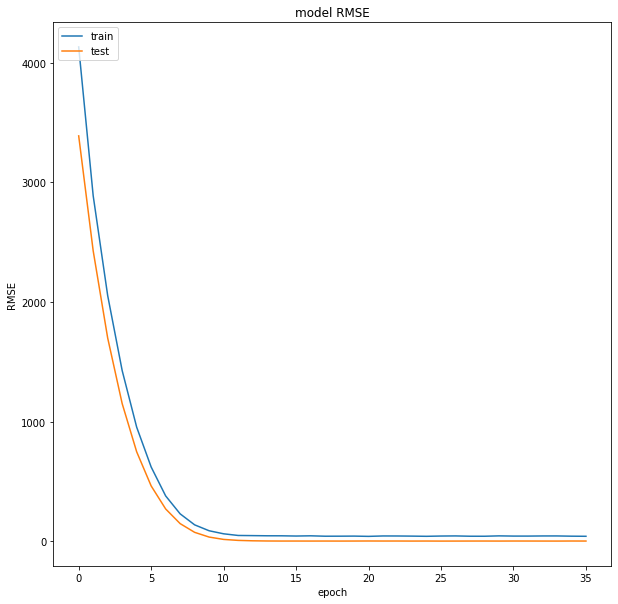

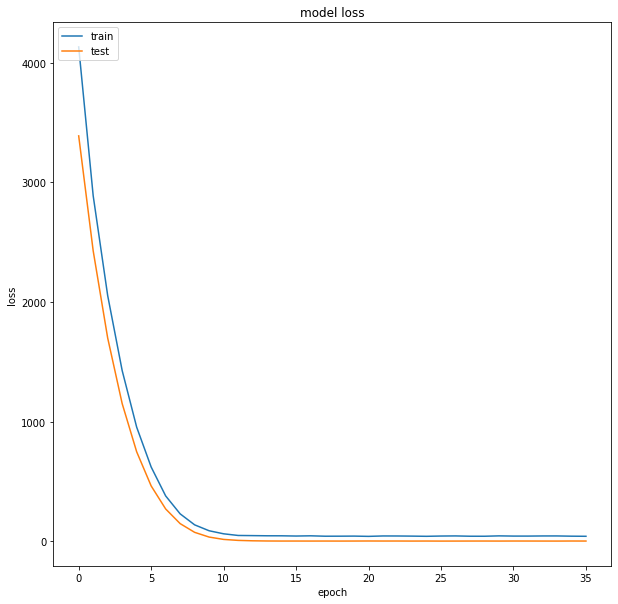

In [48]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("LSTM_rmse1.png")
# summarize history for Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("LSTM_loss1.png")

In [49]:
val_arrays = []
val_labs = []
#create list of GAP readings starting with a minimum of two readings
for end in range(2, len(val_df)-ph):
#add short sequences until we reach the sequence length
  if end < seq_length:
    val_arrays.append(val_df[feat_cols][0:end].to_numpy())
    val_labs.append(val_df['Lon'][end+ph])
#add sequences of seq_length once we have enough data
  else:
    val_arrays.append(val_df[feat_cols][end-seq_length:end].to_numpy())
    val_labs.append(val_df['Lon'][end+ph])
# use the pad_sequences function on your input sequences
# remember that we will later want our datatype to be np.float32
val_arrays = pad_sequences(val_arrays, maxlen = seq_length, dtype = np.float32)
#convert to numpy arrays and floats to appease keras/tensorflow
val_labs = np.array(val_labs, dtype = object).astype(np.float32)

21/21 - 0s - loss: 0.4569 - mse: 0.4569 - 76ms/epoch - 4ms/step

MSE: 0.4569363594055176
21/21 [==============================] - 1s 3ms/step


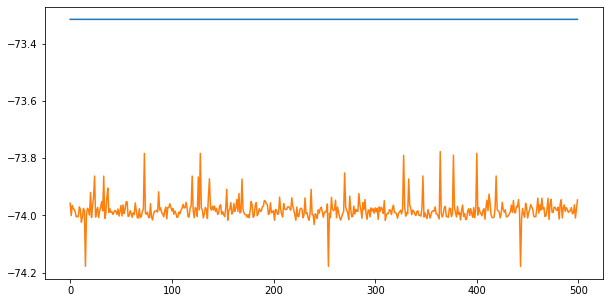

In [50]:
scores_test = model.evaluate(val_arrays, val_labs, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))
y_pred_test = model.predict(val_arrays)
y_true_test = val_labs
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('submit_test.csv', index = None)
# Plot the predicted data vs. the actual data
# we will limit our plot to the first 200 predictions for better visualization
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test[-500:], label = 'Predicted Value')
plt.plot(y_true_test[-500:], label = 'Actual Value')